<table align="left">

  <h1> Options to run the notebook </h1>
 
  <td>
    <a href="https://colab.research.google.com/github/Dong-Xuyong/Aprendizagem/blob/main/Projeto/ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/Dong-Xuyong/Aprendizagem/blob/main/Projeto/ml.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Set up

In [41]:
import urllib.request
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
url = "https://raw.githubusercontent.com/Dong-Xuyong/Aprendizagem/main/Projeto/Dataset/df_final.zip"

urllib.request.urlretrieve(url, "df.zip")

with zipfile.ZipFile("df.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [7]:
df = pd.read_csv("df.csv")

In [18]:
columns_cat = ["typeClient"]
columns_num = ["Week", "SalesUnitWeek", "SalesPesosWeek", "ReturnsUnitNextWeek", "RetrunsPesosNestWeek",
               "Latitude", "Longitude", "weight", "salesDepot"]

In [19]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

num_attribs = columns_num
cat_attribs = columns_cat

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

In [20]:
#Split the target from dataset

X = df.drop('AjustedDemand', axis=1)
X = full_pipeline.fit_transform(X)
y = df['AjustedDemand'].copy()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Decision Tree

In [22]:
# Decision Tree

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [27]:
y_pred_DT = sgd_clf.predict(X_test)
precision_score(y_test, y_pred_DT)

0.9998698989548549

In [29]:
confusion_matrix(y_pred_DT, y_test)

array([[100595,     39],
       [    12,  92224]])

In [24]:
# Random Forest
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

0.9998698989548549

In [30]:
y_pred_RF = sgd_clf.predict(X_test)
precision_score(y_test, y_pred_RF)

0.9998698989548549

In [31]:
confusion_matrix(y_pred_RF, y_test)

array([[100595,     39],
       [    12,  92224]])

In [25]:
# XGBoost

from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
precision_score(y_test, y_pred)

0.9997507639626363

In [26]:
confusion_matrix(y_pred, y_test)

array([[100584,      4],
       [    23,  92259]])

In [32]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

In [33]:
# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [34]:
y_pred_gini = clf_gini.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9980


In [37]:
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini

array([0, 0, 0, ..., 1, 1, 0])

In [38]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.9978


In [39]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9978
Test set score: 0.9980


[Text(0.375, 0.875, 'X[1] <= -0.178\ngini = 0.499\nsamples = 771478\nvalue = [401748, 369730]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 397900\nvalue = [397900, 0]'),
 Text(0.5, 0.625, 'X[4] <= 0.085\ngini = 0.02\nsamples = 373578\nvalue = [3848, 369730]'),
 Text(0.25, 0.375, 'X[4] <= 0.036\ngini = 0.0\nsamples = 364686\nvalue = [66, 364620]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 364339\nvalue = [5, 364334]'),
 Text(0.375, 0.125, 'gini = 0.29\nsamples = 347\nvalue = [61, 286]'),
 Text(0.75, 0.375, 'X[1] <= -0.084\ngini = 0.489\nsamples = 8892\nvalue = [3782, 5110]'),
 Text(0.625, 0.125, 'gini = 0.217\nsamples = 2905\nvalue = [2546, 359]'),
 Text(0.875, 0.125, 'gini = 0.328\nsamples = 5987\nvalue = [1236, 4751]')]

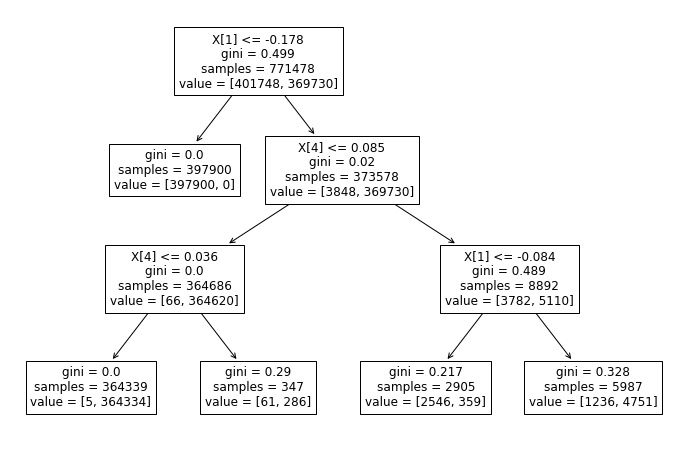

In [42]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))